In [ ]:
import sys
sys.path.append('./soft')

from pfbs import *

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

In [ ]:
# Initialize Firmware.
soc = TopSoc('./pfbs_v2.bit')

# Print information.
print(soc)

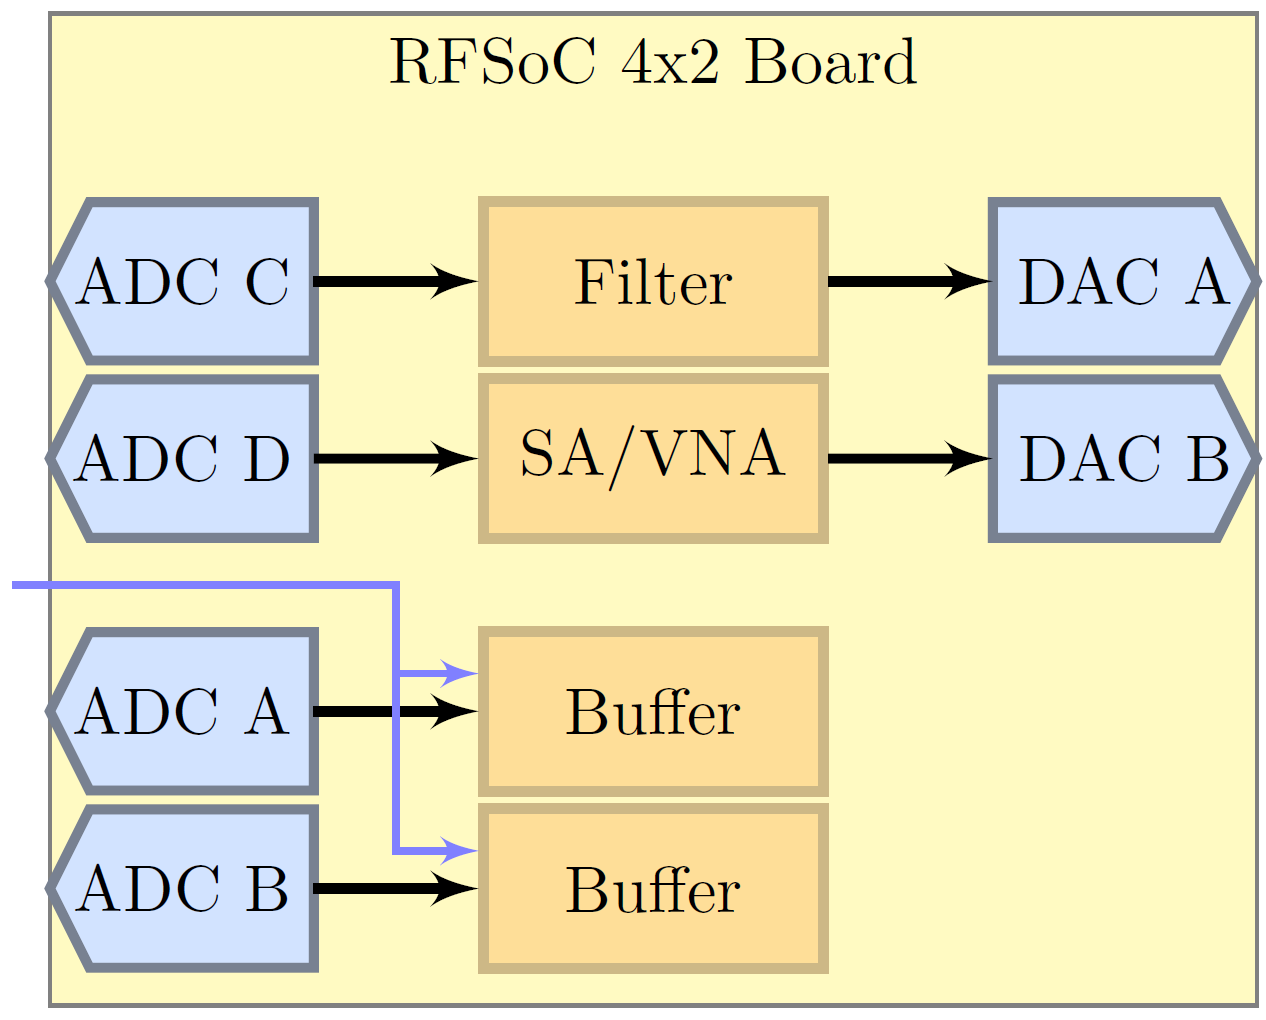

In [1]:
from IPython.display import Image, display
display(Image(filename='images/rfsoc4x2_pfb_v2.png', embed=True))

In [ ]:
#####################################
### Initialize Dual/Filter Chains ###
#####################################

# Dual Chain: it includes both analysis and synthesis chains.
dual = KidsChain(soc, dual=soc['dual'][0])

# Set ADC/DAC mixer frequency.
dual.set_mixer_frequency(1000)

# Filter chain: includes both analysis and synthesis, cascaded.
filt = FilterChain(soc, chain=soc['filter'][0])

In [ ]:
############################
### Filter Configuration ###
############################
# Set quantization.
filt.analysis.qout(2)
filt.synthesis.qout(1)

# Set mixer.
filt.set_mixer_frequency(1000)

# Enable all channels.
filt.allon()

# Set filter band.
#filt.band(flow = 600, fhigh = 620, single=True)
#filt.band(flow = 900, fhigh = 1050, single=False)
#filt.band(flow = 1180, fhigh=1181, single=False)

In [ ]:
##################################
### Generate some output tones ###
##################################
# Disable all outputs.
dual.synthesis.alloff()

# Set quantization.
dual.synthesis.qout(1)

# Set tones.
f_v = np.linspace(500,510,2)
for f in f_v:
    print("f = {} MHz".format(f))
    dual.synthesis.set_tone_simple(f=f, g=0.9)